For Text Mining assignment
TWO:
1) Extract reviews of any product from ecommerce website like amazon
2) Perform emotion mining

In [1]:
from google.colab import files
upload=files.upload()

Saving Review file from Amazon.xlsx to Review file from Amazon.xlsx


In [2]:
import pandas as pd
df=pd.read_excel("Review file from Amazon.xlsx")
df

,Unnamed: 0,Unnamed: 1,Author,Date,Rating,Comment count,Helpful count,Title,Review,Version,Reviewed ASIN,Verified Purchase,Picture included,(view source)
0,1,NaN,Apoorva C S,2023-06-06,4,0,2,4.0 out of 5 stars Not bad,If u r someone who don't like the clicking sou...,Pattern Name: Mouse,B01J0XWYKQ,yes,yes,view review
1,2,NaN,Dibyendu Sekhar Mandal,2023-06-07,5,0,0,5.0 out of 5 stars Useful,nice to hold and use. It is very smooth and up...,Pattern Name: Mouse,B01J0XWYKQ,yes,no,view review
2,3,NaN,Bhushan Bapedkar,2023-06-07,5,0,0,5.0 out of 5 stars Excellent product!,I recently purchased the Logitech Wireless Mou...,Pattern Name: Mouse,B01J0XWYKQ,yes,yes,view review
3,4,NaN,RP,2023-06-07,1,0,0,1.0 out of 5 stars Not worthy,"After 3 month of usage, its not workingWorst p...",Pattern Name: Mouse,B01J0XWYKQ,yes,no,view review
4,5,NaN,Customer,2023-06-07,1,0,0,1.0 out of 5 stars Avoid,Very poor.Dont waste your money.Its not workin...,Pattern Name: Mouse,B01J0XWYKQ,yes,no,view review
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,NaN,Niraj B.,2023-07-02,5,0,0,5.0 out of 5 stars Sleek and convenient,An excellent sleek design and convenient to us...,Pattern Name: Mouse,B01J0XWYKQ,yes,no,view review
96,97,NaN,subin,2023-07-02,4,0,0,4.0 out of 5 stars good,good,Pattern Name: Mouse,B01J0XWYKQ,yes,no,view review
97,98,NaN,Placeholder,2023-07-03,4,0,0,4.0 out of 5 stars Good,"The Quality of product is good, but is not for...",Pattern Name: Mouse,B01J0XWYKQ,yes,no,view review
98,99,NaN,Apurba neogi,2023-07-03,4,0,0,4.0 out of 5 stars Good Product,Perfect hand fit and feel good 😊\nhttps://m.me...,Pattern Name: Mouse,B01J0XWYKQ,yes,yes,view review


In [3]:
from google.colab import files
upload=files.upload()

Saving stop.txt to stop.txt


In [4]:
import pandas as pd
stop_words=pd.read_csv("stop.txt")
stop_words

,a
0,a's
1,able
2,about
3,above
4,according
...,...
565,yours
566,yourself
567,yourselves
568,z


In [5]:
from google.colab import files
upload = files.upload()

Saving positive-words.txt to positive-words.txt


In [6]:
import pandas as pd
pos_words=pd.read_csv("positive-words.txt",sep='\t')
pos_words

,;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;
0,;
1,; Opinion Lexicon: Positive
2,;
3,; This file contains a list of POSITIVE opinio...
4,;
...,...
2034,youthful
2035,zeal
2036,zenith
2037,zest


In [7]:
from google.colab import files
upload=files.upload()

Saving negative-words.txt to negative-words.txt


In [8]:
import pandas as pd
neg_words=pd.read_csv("negative-words.txt",sep="\t",encoding='latin-1')
neg_words

,;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;
0,;
1,; Opinion Lexicon: Negative
2,;
3,; This file contains a list of NEGATIVE opinio...
4,;
...,...
4811,zaps
4812,zealot
4813,zealous
4814,zealously


Emotional analysis

In [9]:
# cleaning the tweets
one_tweet = df.iloc[4]['Review']
one_tweet

'Very poor.Dont waste your money.Its not working properly after 15 days.'

In [10]:
book = df.iloc[:,8:9]
book

,Review
0,If u r someone who don't like the clicking sou...
1,nice to hold and use. It is very smooth and up...
2,I recently purchased the Logitech Wireless Mou...
3,"After 3 month of usage, its not workingWorst p..."
4,Very poor.Dont waste your money.Its not workin...
...,...
95,An excellent sleek design and convenient to us...
96,good
97,"The Quality of product is good, but is not for..."
98,Perfect hand fit and feel good 😊\nhttps://m.me...


In [11]:
stop_words_set = set(stop_words['a'])
 # Convert DataFrame column to a set

In [12]:
def get_emotion(review):
    review_words = set()  # Create an empty set for each review
    words = review.split()  # Split the review into words

    # Remove stop words from the words list
    words = [word for word in words if word.lower() not in stop_words_set]

    review_words.update(words)  # Add the words to the set

    positive_matches = set(review_words).intersection(pos_words)
    negative_matches = set(review_words).intersection(neg_words)

    positive_count = len(positive_matches)
    negative_count = len(negative_matches)

    # Determine the emotion label
    if positive_count > negative_count:
        emotion_label = "Positive"
    elif negative_count > positive_count:
        emotion_label = "Negative"
    else:
        emotion_label = "Neutral"

    # Calculate the emotion level
    emotion_level = positive_count - negative_count

    return emotion_label, emotion_level

In [13]:
# Apply the function to create new 'emotion_label' and 'emotion_level' columns
book[['emotion_label', 'emotion_level']] = book['Review'].apply(get_emotion).apply(pd.Series)

In [14]:
book

,Review,emotion_label,emotion_level
0,If u r someone who don't like the clicking sou...,Neutral,0
1,nice to hold and use. It is very smooth and up...,Neutral,0
2,I recently purchased the Logitech Wireless Mou...,Neutral,0
3,"After 3 month of usage, its not workingWorst p...",Neutral,0
4,Very poor.Dont waste your money.Its not workin...,Neutral,0
...,...,...,...
95,An excellent sleek design and convenient to us...,Neutral,0
96,good,Neutral,0
97,"The Quality of product is good, but is not for...",Neutral,0
98,Perfect hand fit and feel good 😊\nhttps://m.me...,Neutral,0


In [15]:
positive_count = book['emotion_label'].value_counts().get('Positive', 0)
negative_count = book['emotion_label'].value_counts().get('Negative', 0)
Neutral_count = book['emotion_label'].value_counts().get('Neutral', 0)

print("Positive Emotion Count:", positive_count)
print("Negative Emotion Count:", negative_count)
print("Neutral Emotion Count:", Neutral_count)

Positive Emotion Count: 0
Negative Emotion Count: 0
Neutral Emotion Count: 100


In [16]:
book.pivot_table(index=['emotion_label'],aggfunc={"emotion_label":'count'})

,emotion_label
emotion_label,
Neutral,100


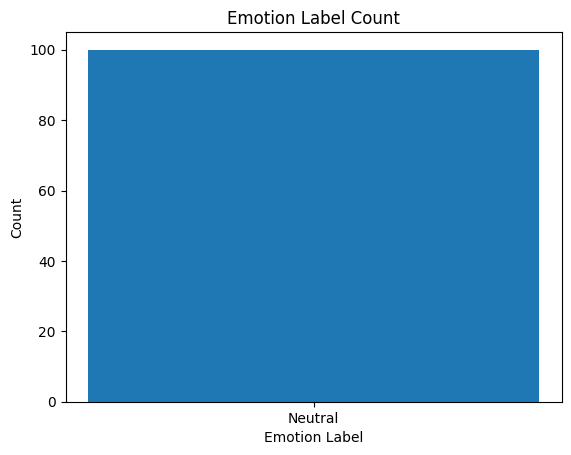

In [17]:
# Plot the bar graph
import matplotlib.pyplot as plt
emotion_counts = book['emotion_label'].value_counts()
plt.bar(emotion_counts.index, emotion_counts.values)
plt.xlabel('Emotion Label')
plt.ylabel('Count')
plt.title('Emotion Label Count')
plt.show()

Text Preprocessing

In [18]:
df = book.iloc[:,0:1]
df

,Review
0,If u r someone who don't like the clicking sou...
1,nice to hold and use. It is very smooth and up...
2,I recently purchased the Logitech Wireless Mou...
3,"After 3 month of usage, its not workingWorst p..."
4,Very poor.Dont waste your money.Its not workin...
...,...
95,An excellent sleek design and convenient to us...
96,good
97,"The Quality of product is good, but is not for..."
98,Perfect hand fit and feel good 😊\nhttps://m.me...


In [19]:
df1 = [x.strip() for x in df.Review] # remove both the leading and the trailing characters
df1 = [x for x in df1 if x] # removes empty strings, because they are considered in Python as False
df1[0:10]

["If u r someone who don't like the clicking sound of mouse this is not the mouse i m just annyoed by the sound NGL it's loud\nhttps://m.media-amazon.com/images/I/8147KoyiSXL._SY88.jpg",
 'nice to hold and use. It is very smooth and up to the mark.',
 "I recently purchased the Logitech Wireless Mouse from Amazon, and I'm thoroughly impressed. The wireless functionality works flawlessly, providing convenient and tangle-free usage. The mouse's performance is outstanding, with smooth cursor movement and responsive buttons, making it perfect for work and gaming. Its ergonomic design ensures a comfortable grip, and the battery life is exceptional. Overall, I highly recommend the Logitech Wireless Mouse for its reliability, durability, and excellent customer service. A must-have peripheral for any computer setup!\nhttps://m.media-amazon.com/images/I/61B43YvghkL._SY88.jpg\nhttps://m.media-amazon.com/images/I/61mAlRN0sSL._SY88.jpg",
 'After 3 month of usage, its not workingWorst product',
 'Ve

In [20]:
# Joining the list into one string/text
text = ' '.join(df1)
text

'If u r someone who don\'t like the clicking sound of mouse this is not the mouse i m just annyoed by the sound NGL it\'s loud\nhttps://m.media-amazon.com/images/I/8147KoyiSXL._SY88.jpg nice to hold and use. It is very smooth and up to the mark. I recently purchased the Logitech Wireless Mouse from Amazon, and I\'m thoroughly impressed. The wireless functionality works flawlessly, providing convenient and tangle-free usage. The mouse\'s performance is outstanding, with smooth cursor movement and responsive buttons, making it perfect for work and gaming. Its ergonomic design ensures a comfortable grip, and the battery life is exceptional. Overall, I highly recommend the Logitech Wireless Mouse for its reliability, durability, and excellent customer service. A must-have peripheral for any computer setup!\nhttps://m.media-amazon.com/images/I/61B43YvghkL._SY88.jpg\nhttps://m.media-amazon.com/images/I/61mAlRN0sSL._SY88.jpg After 3 month of usage, its not workingWorst product Very poor.Dont 

In [21]:
#Punctuation
import string
no_punc_text = text.translate(str.maketrans('', '', string.punctuation)) #with arguments (x, y, z) where 'x' and 'y'
# must be equal-length strings and characters in 'x'
# are replaced by characters in 'y'. 'z'
# is a string (string.punctuation here)
no_punc_text

'If u r someone who dont like the clicking sound of mouse this is not the mouse i m just annyoed by the sound NGL its loud\nhttpsmmediaamazoncomimagesI8147KoyiSXLSY88jpg nice to hold and use It is very smooth and up to the mark I recently purchased the Logitech Wireless Mouse from Amazon and Im thoroughly impressed The wireless functionality works flawlessly providing convenient and tanglefree usage The mouses performance is outstanding with smooth cursor movement and responsive buttons making it perfect for work and gaming Its ergonomic design ensures a comfortable grip and the battery life is exceptional Overall I highly recommend the Logitech Wireless Mouse for its reliability durability and excellent customer service A musthave peripheral for any computer setup\nhttpsmmediaamazoncomimagesI61B43YvghkLSY88jpg\nhttpsmmediaamazoncomimagesI61mAlRN0sSLSY88jpg After 3 month of usage its not workingWorst product Very poorDont waste your moneyIts not working properly after 15 days they send

In [22]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [23]:
#Tokenization
from nltk.tokenize import word_tokenize
text_tokens = word_tokenize(no_punc_text)
print(text_tokens[0:50])
len(text_tokens)

['If', 'u', 'r', 'someone', 'who', 'dont', 'like', 'the', 'clicking', 'sound', 'of', 'mouse', 'this', 'is', 'not', 'the', 'mouse', 'i', 'm', 'just', 'annyoed', 'by', 'the', 'sound', 'NGL', 'its', 'loud', 'httpsmmediaamazoncomimagesI8147KoyiSXLSY88jpg', 'nice', 'to', 'hold', 'and', 'use', 'It', 'is', 'very', 'smooth', 'and', 'up', 'to', 'the', 'mark', 'I', 'recently', 'purchased', 'the', 'Logitech', 'Wireless', 'Mouse', 'from']


1646

In [24]:
#Noramalize the data
lower_words = [x.lower() for x in text_tokens]
print(lower_words[0:25])

['if', 'u', 'r', 'someone', 'who', 'dont', 'like', 'the', 'clicking', 'sound', 'of', 'mouse', 'this', 'is', 'not', 'the', 'mouse', 'i', 'm', 'just', 'annyoed', 'by', 'the', 'sound', 'ngl']


In [25]:
#Stemming
from nltk.stem import PorterStemmer
ps = PorterStemmer()
stemmed_tokens = [ps.stem(word) for word in lower_words]
print(stemmed_tokens[0:40])
len(stemmed_tokens)

['if', 'u', 'r', 'someon', 'who', 'dont', 'like', 'the', 'click', 'sound', 'of', 'mous', 'thi', 'is', 'not', 'the', 'mous', 'i', 'm', 'just', 'annyo', 'by', 'the', 'sound', 'ngl', 'it', 'loud', 'httpsmmediaamazoncomimagesi8147koyisxlsy88jpg', 'nice', 'to', 'hold', 'and', 'use', 'it', 'is', 'veri', 'smooth', 'and', 'up', 'to']


1646

In [26]:
import spacy
# NLP english language model of spacy library
nlp = spacy.load('en_core_web_sm')
nlp

In [27]:
# lemmas being one of them, but mostly POS, which will follow later
doc = nlp(' '.join(stemmed_tokens))
print(doc[0:40])

if u r someon who dont like the click sound of mous thi is not the mous i m just annyo by the sound ngl it loud httpsmmediaamazoncomimagesi8147koyisxlsy88jpg nice to hold and use it is veri smooth and up


In [28]:
lemmas = [token.lemma_ for token in doc]
print(lemmas[0:25])
len(lemmas)

['if', 'u', 'r', 'someon', 'who', 'do', 'not', 'like', 'the', 'click', 'sound', 'of', 'mous', 'thi', 'be', 'not', 'the', 'mous', 'I', 'm', 'just', 'annyo', 'by', 'the', 'sound']


1666

In [29]:
# Feature Extraction
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(lemmas)

In [30]:
print(vectorizer.get_feature_names_out()[50:100])
print(X.toarray()[50:100])

['but' 'butth' 'button' 'button4' 'buy' 'by' 'can' 'career' 'caution'
 'center' 'centr' 'chanc' 'chang' 'cheap' 'claim' 'click' 'come' 'comfort'
 'compact' 'compani' 'compat' 'comput' 'computersnot' 'confid' 'connect'
 'connector' 'consum' 'conveni' 'correctli' 'could' 'creat' 'curser'
 'cursor' 'custom' 'damag' 'day' 'dayswast' 'daytoday' 'decent' 'decrea'
 'defect' 'definit' 'delay' 'design' 'desktop' 'devic' 'diffect'
 'dilevari' 'disappoint' 'distribut']
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [31]:
print(X.toarray().shape)

(1666, 473)


In [32]:
# bigram and trigram

vectorizer_ngram_range=CountVectorizer(analyzer='word',ngram_range=(1,3),max_features=(100))
bow_matrix_ngram = vectorizer_ngram_range.fit_transform(book["Review"])

In [33]:
bow_matrix_ngram

<100x100 sparse matrix of type '<class 'numpy.int64'>'
	with 1060 stored elements in Compressed Sparse Row format>

In [34]:
print(vectorizer_ngram_range.get_feature_names_out())
print(bow_matrix_ngram.toarray())

['_sy88' '_sy88 jpg' 'after' 'amazon' 'amazon com' 'amazon com images'
 'and' 'and it' 'as' 'battery' 'battery life' 'be' 'be loaded' 'been'
 'been using' 'best' 'but' 'buy' 'com' 'com images' 'could' 'could not'
 'could not be' 'for' 'go' 'go for' 'go for it' 'good' 'had' 'has' 'have'
 'https' 'https media' 'https media amazon' 'if' 'images' 'in' 'is'
 'is not' 'it' 'it is' 'its' 'jpg' 'life' 'like' 'loaded' 'logitech'
 'media' 'media amazon' 'media amazon com' 'media could' 'media could not'
 'month' 'months' 'mouse' 'my' 'nice' 'no' 'not' 'not be' 'not be loaded'
 'not working' 'now' 'of' 'of the' 'on' 'one' 'or' 'product' 'properly'
 'quality' 'scroll' 'size' 'stopped' 'stopped working' 'that' 'the'
 'the battery' 'the media' 'the media could' 'the mouse' 'they' 'this'
 'this is' 'this mouse' 'this product' 'to' 'usb' 'use' 'using' 'very'
 'very good' 'was' 'wireless' 'with' 'work' 'working' 'working after'
 'works' 'you']
[[1 1 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [2 2 0 ... 0 1 0]
 .

In [35]:
# TFidf vectorizer

from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer_n_gram_max_features = TfidfVectorizer(norm="l2",analyzer='word', ngram_range=(1,3), max_features = 500)
tf_idf_matrix_n_gram_max_features =vectorizer_n_gram_max_features.fit_transform(book)
print(vectorizer_n_gram_max_features.get_feature_names_out())
print(tf_idf_matrix_n_gram_max_features.toarray())

['emotion_label' 'emotion_level' 'review']
[[0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]]


In [36]:
# Generate wordcloud
# Import packages
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud)
    # No axis details
    plt.axis("off");

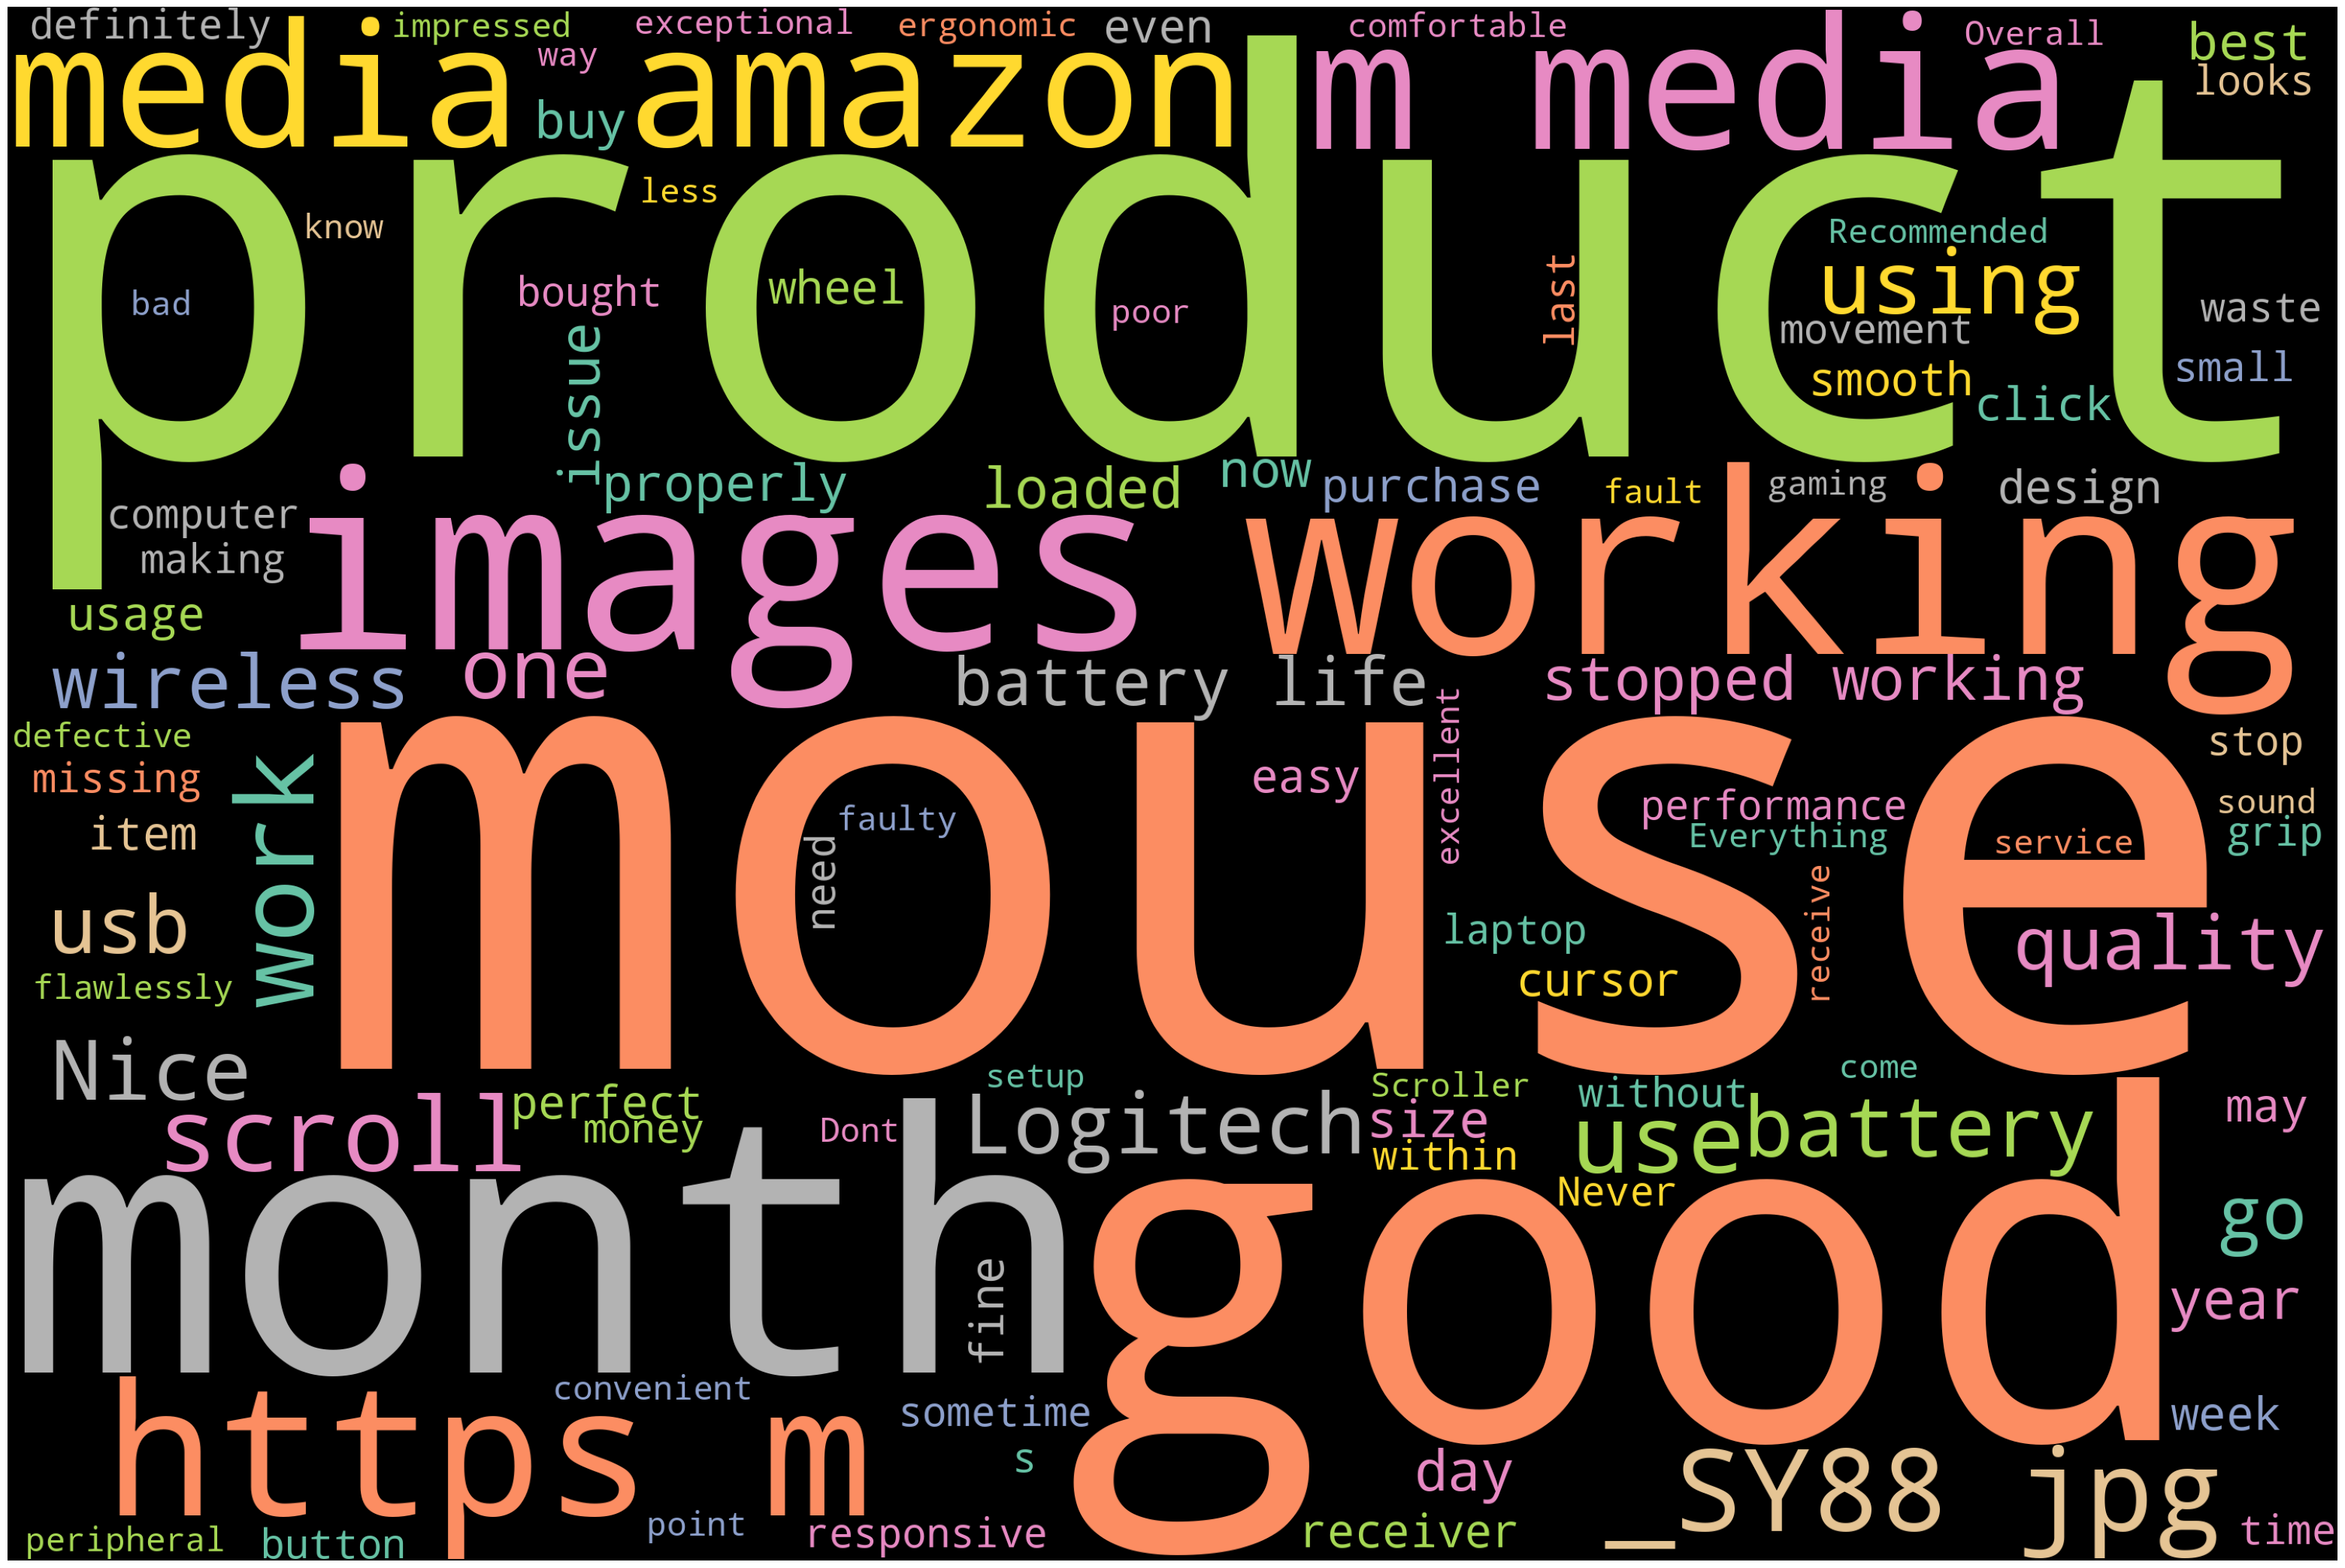

In [37]:
# Generate wordcloud
stopwords = STOPWORDS
stopwords.add('will')
wordcloud = WordCloud(width = 3000, height = 2000, background_color='black', max_words=100,colormap='Set2',stopwords=stopwords).generate(text)
# Plot
plot_cloud(wordcloud)

In [38]:
# Save image
#wordcloud.to_file("wordcloud.png")